In [68]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from Utils import metric_utils


In [16]:
generated_data = np.load("/Users/urkarsh.kulshrestha/Documents/AI_environment/work_env/NeurIPS2024/TS-Diffusion/OUTPUT/technos_diffusion_test.csv/ddpm_predict_technos_diffusion_test.csv.npy")
print(generated_data.shape)

(49, 24, 6)


In [17]:
original_data = np.load("/Users/urkarsh.kulshrestha/Documents/AI_environment/work_env/NeurIPS2024/TS-Diffusion/OUTPUT/technos_diffusion_test.csv/samples/netload_ground_truth_24_test.npy")
print(original_data.shape)

(49, 24, 6)


In [18]:
original_dataframe = pd.DataFrame(original_data.reshape(-1,6), columns = ['Hour', 'DayOfWeek', 'Month', 'DayOfYear', 'Average_Temperature_C', 'netload'])
generated_dataframe = pd.DataFrame(generated_data.reshape(-1,6), columns = ['Hour', 'DayOfWeek', 'Month', 'DayOfYear', 'Average_Temperature_C', 'netload'])

In [19]:
print(original_dataframe)

      Hour  DayOfWeek  Month  DayOfYear  Average_Temperature_C     netload
0      7.0        1.0    9.0      252.0                   27.1  464.860171
1      8.0        1.0    9.0      252.0                   29.1  456.044742
2      9.0        1.0    9.0      252.0                   30.7  204.742214
3     10.0        1.0    9.0      252.0                   31.7  121.911748
4     11.0        1.0    9.0      252.0                   32.7   52.186991
...    ...        ...    ...        ...                    ...         ...
1171  14.0        2.0    9.0      253.0                   31.6   36.150023
1172  15.0        2.0    9.0      253.0                   30.6   35.688836
1173  16.0        2.0    9.0      253.0                   30.5   35.664424
1174  17.0        2.0    9.0      253.0                   29.4   32.077666
1175  18.0        2.0    9.0      253.0                   28.6   15.844295

[1176 rows x 6 columns]


In [20]:
print(generated_dataframe)

           Hour  DayOfWeek     Month   DayOfYear  Average_Temperature_C  \
0     20.990515   3.999253  9.000000  255.007401              24.756402   
1     22.019255   4.001148  8.999965  255.003892              24.508235   
2     22.994639   4.003704  8.999720  255.004307              24.174596   
3      0.000000   5.002961  8.999924  256.004555              24.085938   
4      1.000927   5.002309  9.000000  256.003604              24.303154   
...         ...        ...       ...         ...                    ...   
1171   8.995081   0.004255  8.999541  251.014950              30.432386   
1172  10.022607   0.002610  8.999852  251.012470              31.330951   
1173  10.994487   0.000000  8.999770  251.014347              31.320307   
1174  11.980460   0.000000  8.999782  251.018363              32.672226   
1175  12.998577   0.000000  8.999783  251.017331              32.623098   

         netload  
0      15.488934  
1      14.077615  
2      22.901829  
3      95.576861  
4   

In [21]:
def convert_time_to_datetime(df):
    df = df.copy()
    
    # convert DayOfYear to integer for day-of-year
    day_of_year_int = df['DayOfYear'].astype(int)
    
    # extract fractional hours
    hours_float = df['Hour']
    
    # create date using Year + day-of-year
    df['Timestamp'] = pd.to_datetime('2025', format='%Y') + pd.to_timedelta(day_of_year_int - 1, unit='d')
    
    # add fractional hours
    df['Timestamp'] += pd.to_timedelta(hours_float, unit='h')
    
    return df

In [22]:
original_dataframe_with_date = convert_time_to_datetime(original_dataframe)
generated_dataframe_with_date = convert_time_to_datetime(generated_dataframe)

In [23]:
original_dataframe_with_date

,Hour,DayOfWeek,Month,DayOfYear,Average_Temperature_C,netload,Timestamp
0,7.0,1.0,9.0,252.0,27.1,464.860171,2025-09-09 07:00:00
1,8.0,1.0,9.0,252.0,29.1,456.044742,2025-09-09 08:00:00
2,9.0,1.0,9.0,252.0,30.7,204.742214,2025-09-09 09:00:00
3,10.0,1.0,9.0,252.0,31.7,121.911748,2025-09-09 10:00:00
4,11.0,1.0,9.0,252.0,32.7,52.186991,2025-09-09 11:00:00
...,...,...,...,...,...,...,...
1171,14.0,2.0,9.0,253.0,31.6,36.150023,2025-09-10 14:00:00
1172,15.0,2.0,9.0,253.0,30.6,35.688836,2025-09-10 15:00:00
1173,16.0,2.0,9.0,253.0,30.5,35.664424,2025-09-10 16:00:00
1174,17.0,2.0,9.0,253.0,29.4,32.077666,2025-09-10 17:00:00


In [50]:
def visualize_netload(original_df, generated_df, start_idx=0, end_idx=1200):
    plt.figure(figsize=(15, 6))
    fig, ax =  plt.subplots(2,1, figsize=(15, 6))
    ax[0].plot(original_df['Timestamp'][start_idx:end_idx], original_df['netload'][start_idx:end_idx], label='Original Netload', color='blue')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Netload')
    ax[0].set_title('Original Netload')
    ax[0].legend()
    ax[0].grid()
    ax[1].plot(generated_df['Timestamp'][start_idx:end_idx], generated_df['netload'][start_idx:end_idx], label='Generated Netload', color='orange', alpha=0.7)
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Netload')
    ax[1].set_title('Generated Netload')
    ax[1].legend()
    ax[1].grid()
    plt.show()

<Figure size 1500x600 with 0 Axes>

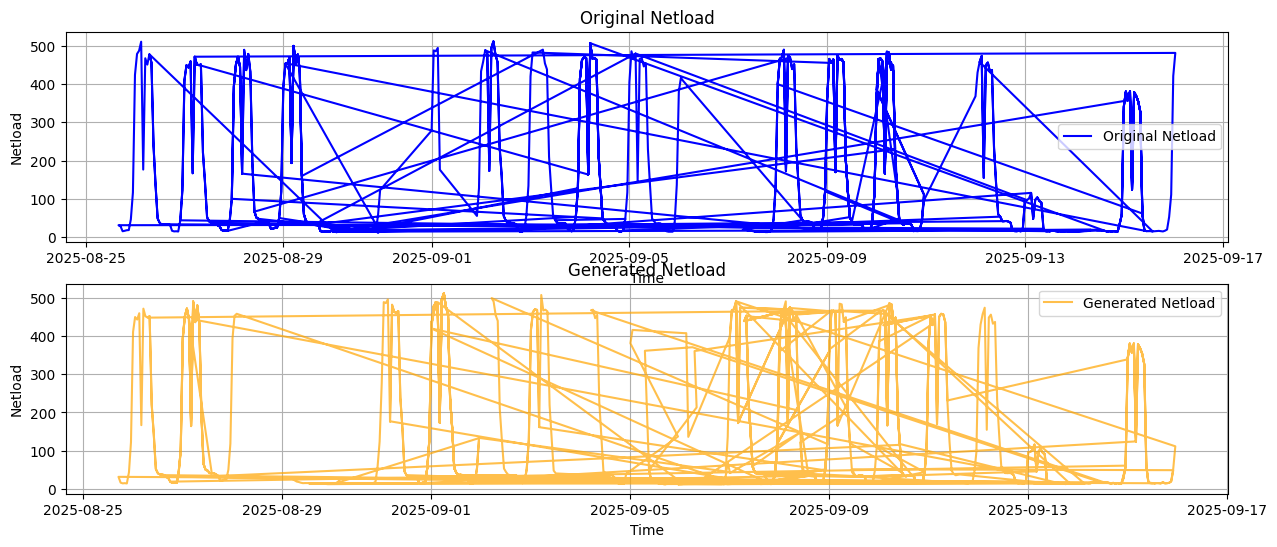

In [51]:
visualize_netload(original_dataframe_with_date, generated_dataframe_with_date, start_idx=0, end_idx=1200)

In [54]:
def visualize_sorted_netload(original, generated):
    fig, axis =  plt.subplots(2,1, figsize=(14, 6))
    original_df = original.copy()
    generated_df = generated.copy()
    original_df_sorted = original_df.sort_values(by='Timestamp')
    generated_df_sorted = generated_df.sort_values(by='Timestamp')
    axis[0].plot(original_df_sorted['Timestamp'], original_df_sorted['netload'],label='Original Netload', color='blue')
    axis[0].set_ylabel('Netload')
    axis[0].set_title('Netload after Timestamp Sorting')
    axis[0].legend()
    axis[0].grid()
    axis[1].plot(generated_df_sorted['Timestamp'], generated_df_sorted['netload'], label='Generated Netload', color='orange', alpha=0.7)
    axis[1].set_xlabel('Timestamp')
    axis[1].set_ylabel('Netload')
    axis[1].legend()
    axis[1].grid()
    plt.show()

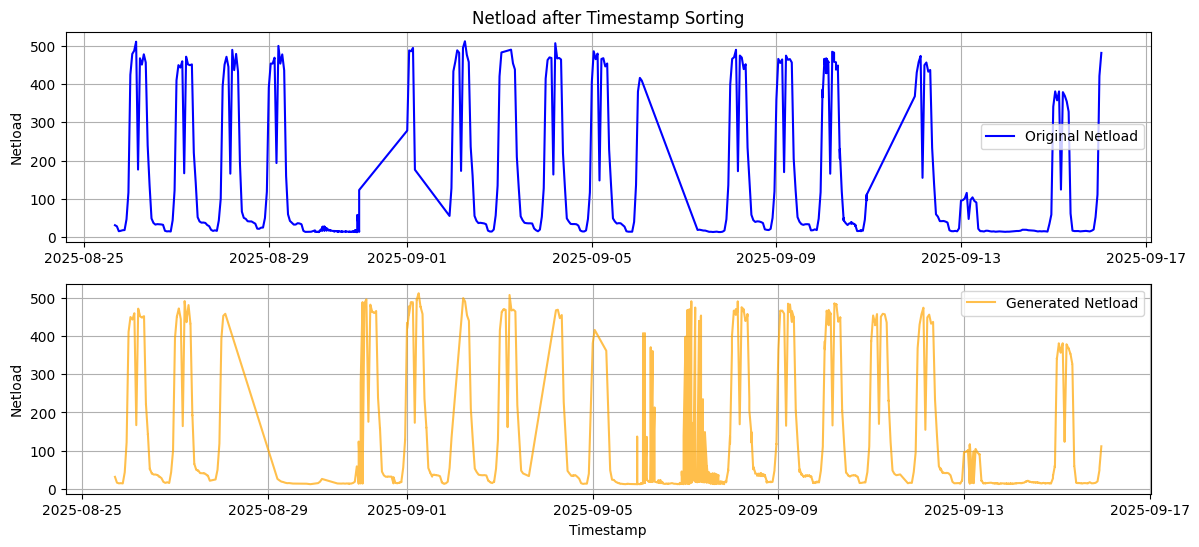

In [55]:
visualize_sorted_netload(original_dataframe_with_date, generated_dataframe_with_date)

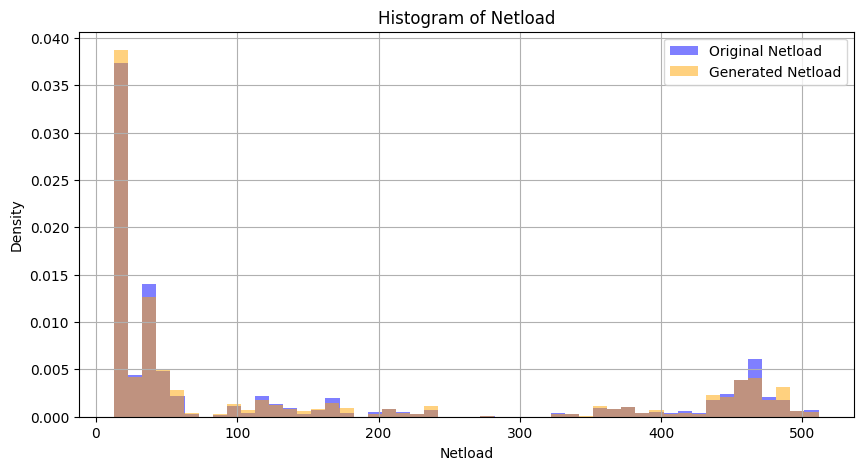

In [58]:
def plot_histogram_netload(original, generated, bins=50):
    plt.figure(figsize=(10, 5))
    plt.hist(original['netload'], bins=bins, alpha=0.5, label='Original Netload', color='blue', density=True)
    plt.hist(generated['netload'], bins=bins, alpha=0.5, label='Generated Netload', color='orange', density=True)
    plt.xlabel('Netload')
    plt.ylabel('Density')
    plt.title('Histogram of Netload')
    plt.legend()
    plt.grid()
    plt.show()

plot_histogram_netload(original_dataframe_with_date, generated_dataframe_with_date, bins=50)

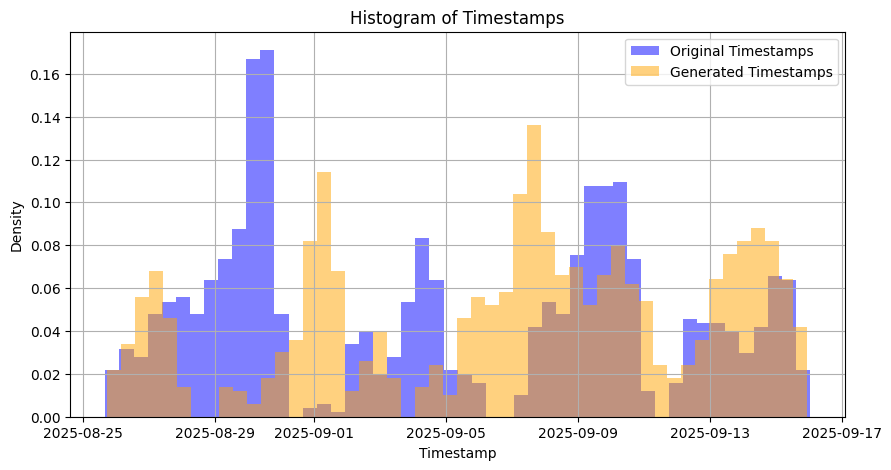

In [60]:
def plot_histogram_datetime(original, generated, bins=50):
    plt.figure(figsize=(10, 5))
    plt.hist(original['Timestamp'], bins=bins, alpha=0.5, label='Original Timestamps', color='blue', density=True)
    plt.hist(generated['Timestamp'], bins=bins, alpha=0.5, label='Generated Timestamps', color='orange', density=True)
    plt.xlabel('Timestamp')
    plt.ylabel('Density')
    plt.title('Histogram of Timestamps')
    plt.legend()
    plt.grid()
    plt.show()

plot_histogram_datetime(original_dataframe_with_date, generated_dataframe_with_date, bins=50)

In [62]:
def data_statistics(dataframe_with_date):
    print("Data Statistics:")
    print(dataframe_with_date.describe())


data_statistics(original_dataframe_with_date)

Data Statistics:
              Hour    DayOfWeek        Month    DayOfYear  \
count  1176.000000  1176.000000  1176.000000  1176.000000   
mean     11.500000     2.961735     8.616497   247.616497   
std       6.925132     1.931878     0.486446     6.250926   
min       0.000000     0.000000     8.000000   237.000000   
25%       5.750000     1.000000     8.000000   242.000000   
50%      11.500000     3.000000     9.000000   247.000000   
75%      17.250000     5.000000     9.000000   253.000000   
max      23.000000     6.000000     9.000000   259.000000   

       Average_Temperature_C      netload  
count            1176.000000  1176.000000  
mean               28.550595   145.505326  
std                 2.716797   179.361041  
min                23.000000    12.854351  
25%                26.500000    16.514523  
50%                27.900000    36.892130  
75%                30.700000   239.446907  
max                35.300000   511.371639  


In [63]:
data_statistics(generated_dataframe_with_date)

Data Statistics:
              Hour    DayOfWeek        Month    DayOfYear  \
count  1176.000000  1176.000000  1176.000000  1176.000000   
mean     11.501764     2.772078     8.869809   250.046491   
std       6.926348     2.205549     0.336520     5.518044   
min       0.000000     0.000000     8.000000   237.982521   
25%       5.738548     0.995238     8.999742   244.994455   
50%      11.498233     2.003404     8.999914   250.998113   
75%      17.265749     5.004565     9.000000   254.010665   
max      23.000000     6.000000     9.000000   258.022474   

       Average_Temperature_C      netload  
count            1176.000000  1176.000000  
mean               28.290057   141.799789  
std                 2.603438   176.729829  
min                22.900000    12.771827  
25%                26.404095    16.461796  
50%                27.911396    36.993356  
75%                30.328600   232.002901  
max                35.300000   511.371639  


[t-SNE] Computing 97 nearest neighbors...
[t-SNE] Indexed 98 samples in 0.000s...
[t-SNE] Computed neighbors for 98 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 98 / 98
[t-SNE] Mean sigma: 7.092798
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.318802
[t-SNE] KL divergence after 300 iterations: 0.448845


/Users/urkarsh.kulshrestha/Documents/AI_environment/work_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/urkarsh.kulshrestha/Documents/AI_environment/work_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


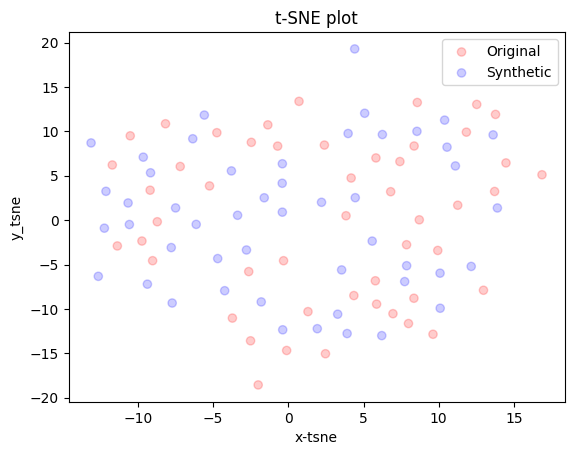

In [82]:
netload_index = 0
original_netload = original_data[:,:,netload_index:netload_index+5]  # shape: (49,24,1)
generated_netload = generated_data[:,:,netload_index:netload_index+5]
metric_utils.visualization(original_netload, generated_netload, analysis= 'tsne')
    

In [83]:
!pwd

/Users/urkarsh.kulshrestha/Documents/AI_environment/work_env/NeurIPS2024/TS-Diffusion
